<h1 style='font-size:2rem;color:blue;'>During the summer school in November 2024, we had the opportunity to visit several polluted areas and landfills in Kumasi to observe firsthand how waste is being managed.
As part of the project, we collected valuable data using Atmotube, a portable air quality monitor. 
I then analyzed the pollution levels and assessed their potential impacts on human health and the environment. 
Below is the script I used to evaluate the air quality at the dumping site.</h1>

In [1]:
ls

 AQ2.xlsx*                            oti_environ_variables.png
 AQ_Survey.xlsx*                      Oti_Landfill.csv*
'Ayeduase gate.csv'*                  Oti_Landfill.ipynb
 environmental_data_time_series.png   pie_oti.png
 heatmap_oti.png                      pie.png
 heatmap.png                         'THe Atmos defenders.ipynb'
 MLR/                                 Untitled.ipynb


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = pd.read_csv("Oti_Landfill.csv")
a

,Date,"VOC, ppm",AQS,"Temperature, ˚C","Humidity, %","Pressure, mbar","PM1, ug/m³","PM2.5, ug/m³","PM10, ug/m³"
0,11/12/2024 16:54,0.800,64,28,71,979.10,18.8,21.4,22.2
1,11/12/2024 16:53,0.833,64,28,74,979.00,19.8,22.2,22.9
2,11/12/2024 16:52,0.790,64,28,72,979.10,17.9,20.0,21.0
3,11/12/2024 16:51,0.808,64,27,75,979.10,18.6,20.8,21.9
4,11/12/2024 16:50,0.849,63,28,73,979.10,17.9,20.3,21.3
...,...,...,...,...,...,...,...,...,...
290,11/12/2024 12:04,0.360,78,25,51,980.85,7.0,10.0,11.0
291,11/12/2024 12:03,0.361,78,25,52,980.86,7.0,9.0,11.0
292,11/12/2024 12:02,0.362,78,25,52,980.86,7.0,9.0,11.0
293,11/12/2024 12:01,0.363,78,25,52,980.88,7.0,10.0,12.0


In [3]:
b=a['Date'] = pd.to_datetime(a['Date'], errors='coerce')
time = b.dt.strftime('%H:%M')
c=a['VOC, ppm']
d=a['PM1, ug/m³']
e=a['PM2.5, ug/m³']
f=a['PM10, ug/m³']
g=a['AQS']
h=a['Humidity, %']
i=a['Temperature, ˚C']

In [4]:
time

0      16:54
1      16:53
2      16:52
3      16:51
4      16:50
       ...  
290    12:04
291    12:03
292    12:02
293    12:01
294    12:00
Name: Date, Length: 295, dtype: object

Correlation between PM 1.0 and PM 2.5: 1.00
Correlation between PM 1.0 and PM 10: 0.99
Correlation between PM 2.5 and PM 10: 1.00
Correlation between PM 1.0 and AQS: -0.69


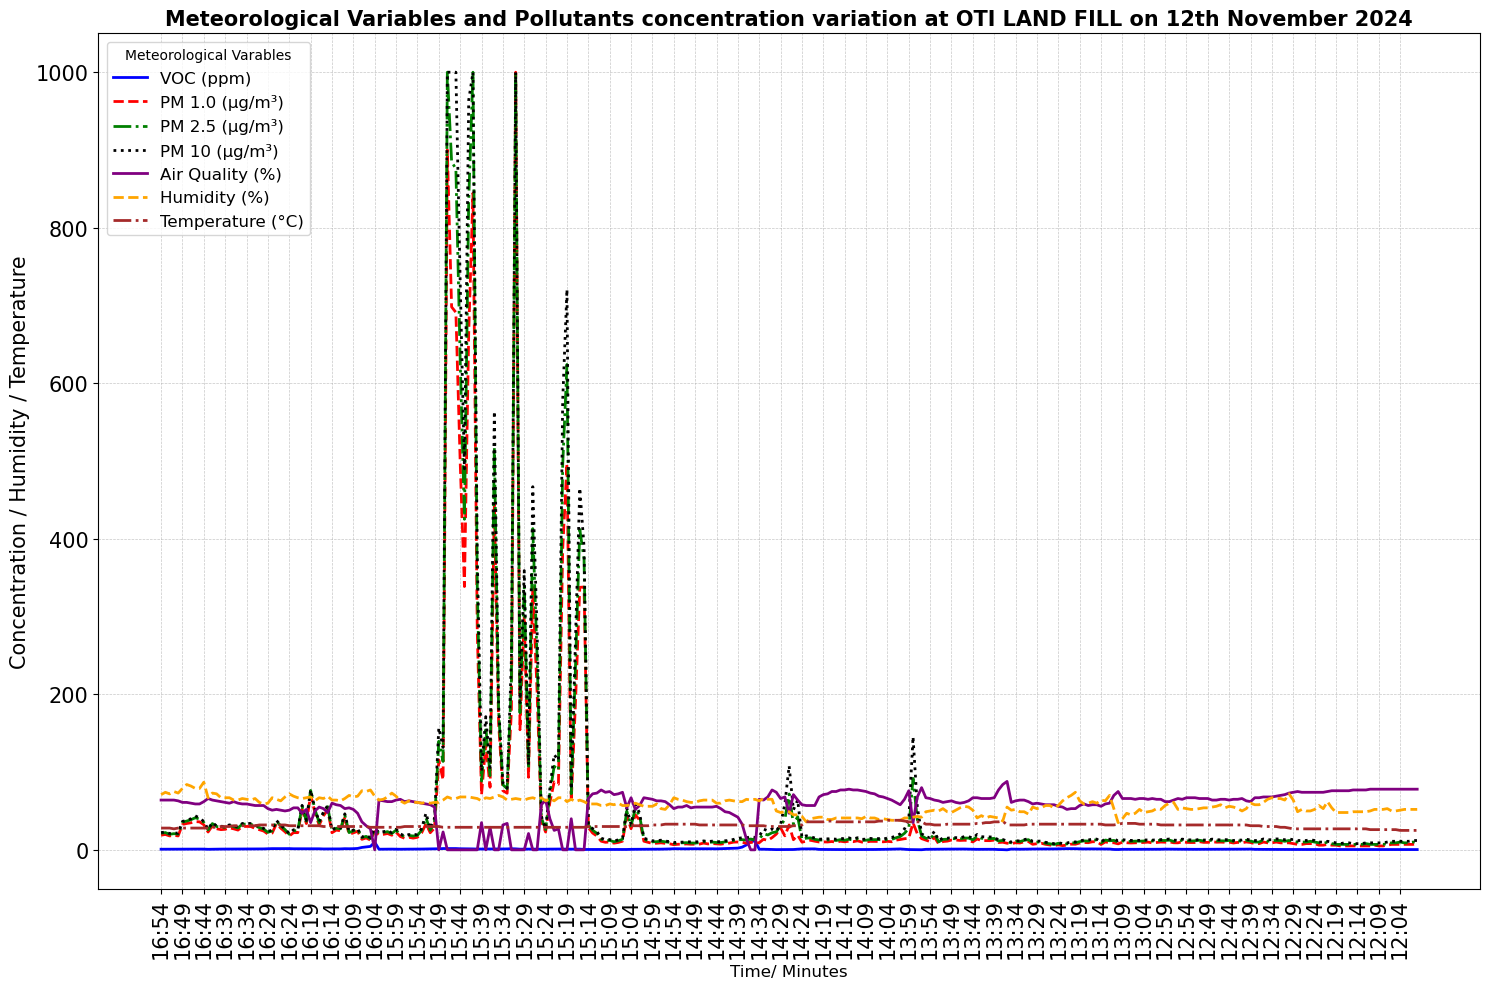

In [37]:
# Calculate correlations between different variables
corr_de = np.corrcoef(d, e)[0, 1] 
corr_df = np.corrcoef(d, f)[0, 1] 
corr_ef = np.corrcoef(e, f)[0, 1] 
corr_dg = np.corrcoef(d, g)[0, 1]

# Print the correlation values
print(f"Correlation between PM 1.0 and PM 2.5: {corr_de:.2f}")
print(f"Correlation between PM 1.0 and PM 10: {corr_df:.2f}")
print(f"Correlation between PM 2.5 and PM 10: {corr_ef:.2f}")
print(f"Correlation between PM 1.0 and AQS: {corr_dg:.2f}")

# Create the plot
plt.figure(figsize=(15, 10))

# Plot each variable with different line styles for clarity
plt.plot(time, c, label='VOC (ppm)', color='b', linewidth=2, linestyle='-')
plt.plot(time, d, label='PM 1.0 (µg/m³)', color='r', linewidth=2, linestyle='--')
plt.plot(time, e, label='PM 2.5 (µg/m³)', color='g', linewidth=2, linestyle='-.')
plt.plot(time, f, label='PM 10 (µg/m³)', color='black', linewidth=2, linestyle=':')
plt.plot(time, g, label='Air Quality (%)', color='purple', linewidth=2, linestyle='-')
plt.plot(time, h, label='Humidity (%)', color='orange', linewidth=2, linestyle='--')
plt.plot(time, i, label='Temperature (°C)', color='brown', linewidth=2, linestyle='-.')

# Title and labels
plt.title("Meteorological Variables and Pollutants concentration variation at OTI LAND FILL on 12th November 2024", fontsize=15, fontweight='bold')
plt.xlabel("Time/ Minutes", fontsize=12)
plt.ylabel("Concentration / Humidity / Temperature", fontsize=15)

# Adding correlation values as annotations
#plt.text(0.05, 0.65, f'Corr (1.0 & 2.5 µg/m³): {corr_de:.2f}', color='b', fontsize=14, transform=plt.gca().transAxes)
#plt.text(0.05, 0.60, f'Corr (1.0 & 10 µg/m³): {corr_df:.2f}', color='b', fontsize=14, transform=plt.gca().transAxes)
#plt.text(0.05, 0.58, f'Corr (2.5 & 10 µg/m³): {corr_ef:.2f}', color='b', fontsize=14, transform=plt.gca().transAxes)
#plt.text(0.05, 0.55, f'Corr (1.0 µg/m³ & AQS %): {corr_dg:.2f}', color='b', fontsize=14, transform=plt.gca().transAxes)

# Gridlines and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title='Meteorological Varables', loc='upper left', fontsize=12)

# Format x-ticks
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
interval = 5  # Adjust the interval based on your time series length
plt.xticks(range(0, len(time), interval), time[::interval])

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("oti_environ_variables.png",dpi=500)
plt.show()

Correlation between PM 1.0 and PM 2.5: 1.00
Correlation between PM 1.0 and PM 10: 0.99
Correlation between PM 2.5 and PM 10: 1.00
Correlation between PM 1.0 and AQS: -0.69


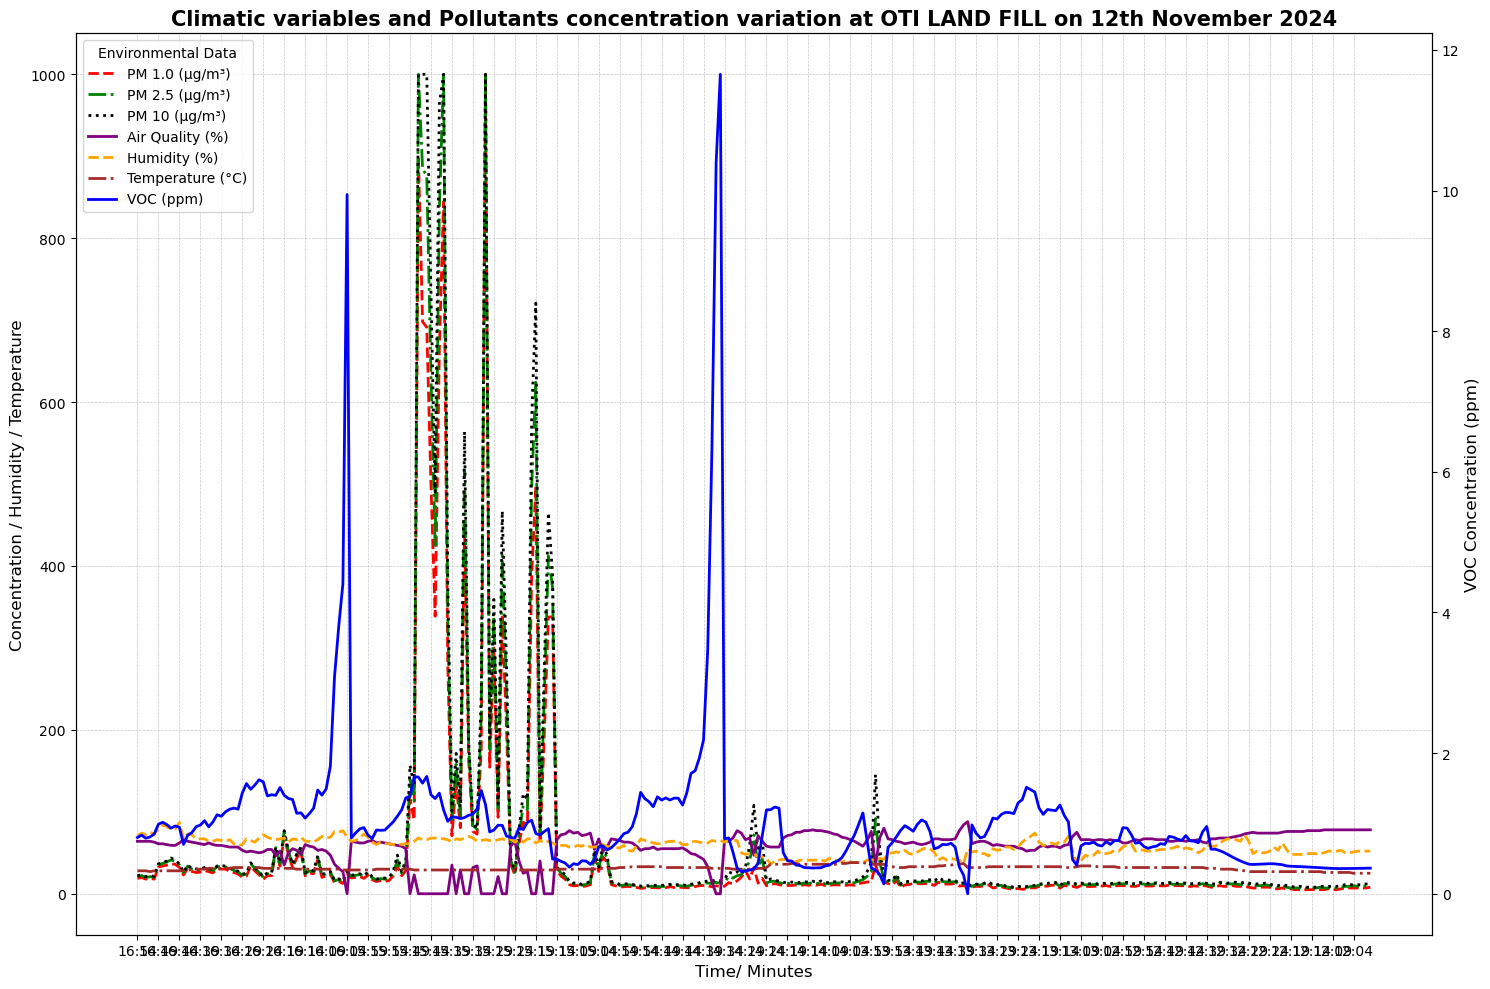

In [103]:
import matplotlib.pyplot as plt

# Calculate correlations between different variables
corr_de = np.corrcoef(d, e)[0, 1]  # PM1.0 and PM2.5
corr_df = np.corrcoef(d, f)[0, 1]  # PM1.0 and PM10
corr_ef = np.corrcoef(e, f)[0, 1]  # PM2.5 and PM10
corr_dg = np.corrcoef(d, g)[0, 1]  # PM1.0 and AQS

# Print the correlation values
print(f"Correlation between PM 1.0 and PM 2.5: {corr_de:.2f}")
print(f"Correlation between PM 1.0 and PM 10: {corr_df:.2f}")
print(f"Correlation between PM 2.5 and PM 10: {corr_ef:.2f}")
print(f"Correlation between PM 1.0 and AQS: {corr_dg:.2f}")

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the first axis (primary y-axis for pollutants and climatic data)
ax1.plot(time, d, label='PM 1.0 (µg/m³)', color='r', linewidth=2, linestyle='--')
ax1.plot(time, e, label='PM 2.5 (µg/m³)', color='g', linewidth=2, linestyle='-.')
ax1.plot(time, f, label='PM 10 (µg/m³)', color='black', linewidth=2, linestyle=':')
ax1.plot(time, g, label='Air Quality (%)', color='purple', linewidth=2, linestyle='-')
ax1.plot(time, h, label='Humidity (%)', color='orange', linewidth=2, linestyle='--')
ax1.plot(time, i, label='Temperature (°C)', color='brown', linewidth=2, linestyle='-.')

# Label the primary y-axis
ax1.set_xlabel("Time/ Minutes", fontsize=12)
ax1.set_ylabel("Concentration / Humidity / Temperature", fontsize=12)

# Adding the correlation values as annotations (optional)
# ax1.text(0.05, 0.65, f'Corr (1.0 & 2.5 µg/m³): {corr_de:.2f}', color='b', fontsize=14, transform=ax1.transAxes)
# ax1.text(0.05, 0.60, f'Corr (1.0 & 10 µg/m³): {corr_df:.2f}', color='b', fontsize=14, transform=ax1.transAxes)
# ax1.text(0.05, 0.58, f'Corr (2.5 & 10 µg/m³): {corr_ef:.2f}', color='b', fontsize=14, transform=ax1.transAxes)
# ax1.text(0.05, 0.55, f'Corr (1.0 µg/m³ & AQS %): {corr_dg:.2f}', color='b', fontsize=14, transform=ax1.transAxes)

# Twin axis for the VOC (VOC on a different scale)
ax2 = ax1.twinx()
ax2.plot(time, c, label='VOC (ppm)', color='b', linewidth=2, linestyle='-')

# Label the secondary y-axis (for VOCs)
ax2.set_ylabel("VOC Concentration (ppm)", fontsize=12)

# Title and gridlines
plt.title("Climatic variables and Pollutants concentration variation at OTI LAND FILL on 12th November 2024", fontsize=15, fontweight='bold')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Format x-ticks
plt.xticks(rotation=90)
interval = 5  # Adjust the interval based on your time series length
plt.xticks(range(0, len(time), interval), time[::interval])

# Adding a legend (for both axes)
lines, labels = ax1.get_legend_handles_labels()  # Handles and labels for primary axis
lines2, labels2 = ax2.get_legend_handles_labels()  # Handles and labels for secondary axis
ax1.legend(lines + lines2, labels + labels2, title="Meteorological parameters", loc='upper left', fontsize=12)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("aa_voc_twin_axes.png")
plt.show()


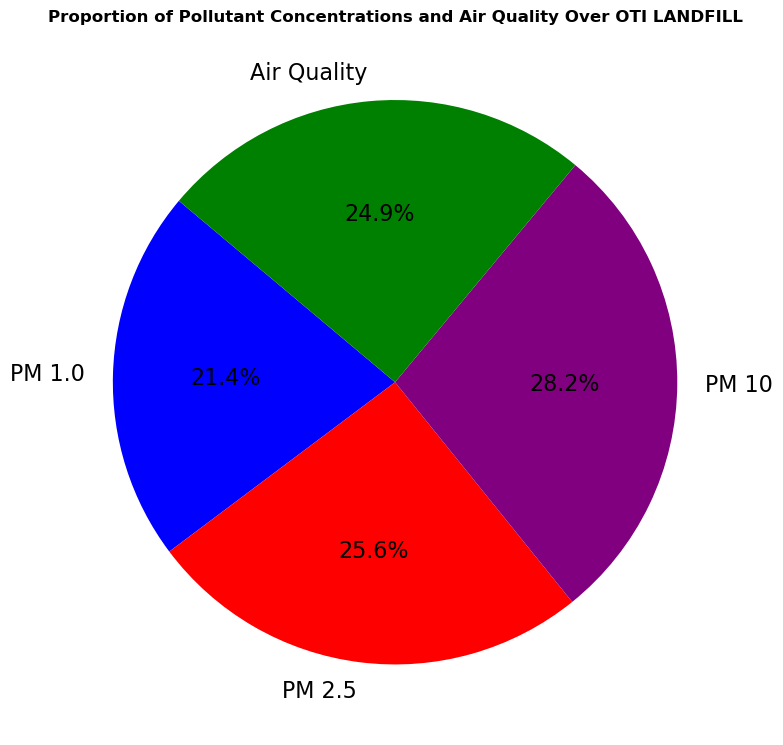

In [55]:
import numpy as np
import matplotlib.pyplot as plt
total_pm_1_0 = np.sum(d)
total_pm_2_5 = np.sum(e)
total_pm_10 = np.sum(f)
total_aqs = np.sum(g)

# Create a list of total concentrations
total_concentrations = [total_pm_1_0, total_pm_2_5, total_pm_10, total_aqs]

# Create labels for the pollutants
pollutant_labels = ['PM 1.0', 'PM 2.5', 'PM 10', 'Air Quality']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_concentrations, labels=pollutant_labels, autopct='%1.1f%%', textprops={'fontsize': 16},startangle=140, colors=['blue', 'red', 'purple','green'])
# Title
plt.title("Proportion of Pollutant Concentrations and Air Quality Over OTI LANDFILL", fontsize=12, fontweight='bold')

# Display the pie chart
plt.tight_layout()
plt.savefig('pie_oti.png',dpi=500)
plt.show()


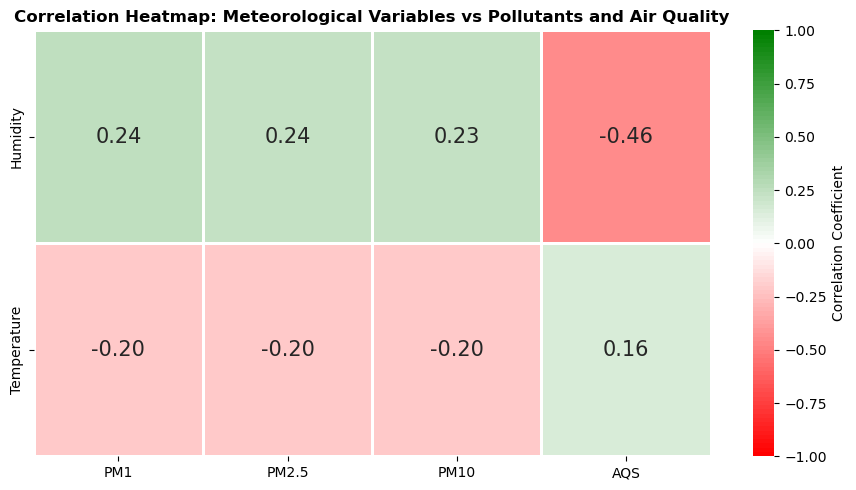

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


corr_hd = np.corrcoef(h, d)[0, 1]  # Humidity vs PM 1.0
corr_he = np.corrcoef(h, e)[0, 1]  # Humidity vs PM 2.5
corr_hf = np.corrcoef(h, f)[0, 1]  # Humidity vs PM 10
corr_hg = np.corrcoef(h, g)[0, 1]  # Humidity vs AQS

corr_id = np.corrcoef(i, d)[0, 1]  # Temperature vs PM 1.0
corr_ie = np.corrcoef(i, e)[0, 1]  # Temperature vs PM 2.5
corr_if = np.corrcoef(i, f)[0, 1]  # Temperature vs PM 10
corr_ig = np.corrcoef(i, g)[0, 1]  # Temperature vs AQS

# Create a correlation matrix for the heatmap
corr_matrix_climatic = np.array([[corr_hd, corr_he, corr_hf, corr_hg],
                                 [corr_id, corr_ie, corr_if, corr_ig]])

corr_df_climatic = pd.DataFrame(corr_matrix_climatic,
                                columns=['PM1', 'PM2.5', 'PM10', 'AQS'],
                                index=['Humidity', 'Temperature'])

colors = ["red", "white", "green"]  
n_bins = 100  
cmap_name = 'green_white_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap with custom colormap
plt.figure(figsize=(9, 5))
sns.heatmap(corr_df_climatic, annot=True, cmap=cm, vmin=-1, vmax=1, fmt=".2f", linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'size': 15})

# Title and labels
plt.title("Correlation Heatmap: Meteorological Variables vs Pollutants and Air Quality", fontsize=12, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.savefig('heatmap_oti.png',dpi=500)
plt.show()
